In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow import keras

In [2]:
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data

In [3]:
(x_train,y_train), (x_test,y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

Training images- 60000 images

Testing images- 10000 images

In [9]:
#printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [10]:
x_train[10].shape

(28, 28)

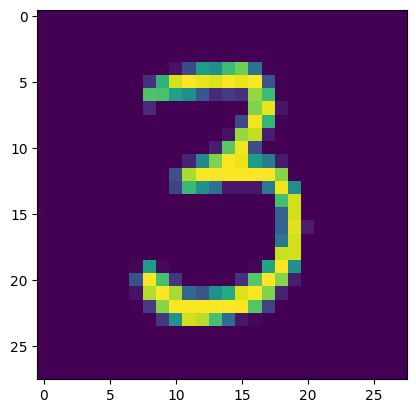

3


In [11]:
#displaying image
plt.imshow(x_train[50])
plt.show()
print(y_train[50])

Image Labels

In [12]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [13]:
#unique values in y_train
print(np.unique(y_train))

#unique value in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply One Hot Encoding

In [14]:
# scaling the values

x_train= x_train/255
x_test= x_test/255

In [15]:
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [16]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

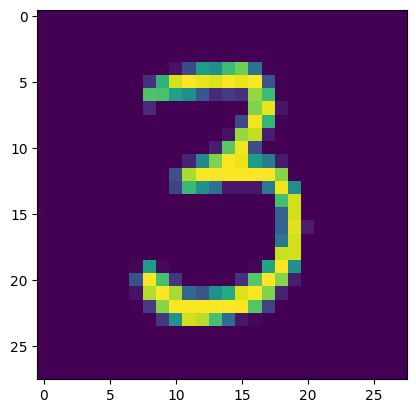

In [17]:
plt.imshow(x_train[50])
plt.show()

Building the neural network

In [18]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy']
)

In [20]:
# training the neural network

model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8459 - loss: 0.5346
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9564 - loss: 0.1436
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9691 - loss: 0.1019
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9751 - loss: 0.0815
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9791 - loss: 0.0677
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0570
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0471
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0410
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9887 - loss: 0.0357
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0314


In [21]:
loss, accuracy= model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1585


In [22]:
print('test data accuracy =',accuracy*100)

test data accuracy = 96.78000211715698


In [23]:
print(x_test.shape)

(10000, 28, 28)


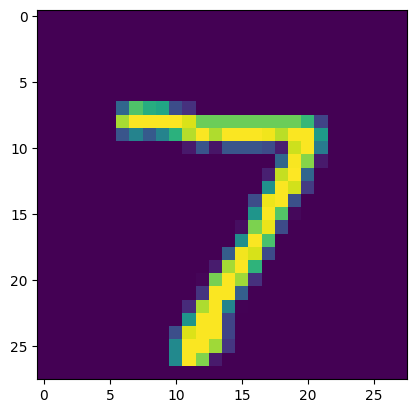

In [24]:
# first data point in test data
plt.imshow(x_test[0])
plt.show()

In [25]:
print(y_test[0])

7


In [26]:
y_pred= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [27]:
print(y_pred.shape)

(10000, 10)


In [28]:
print(y_pred[0])

[2.0215292e-02 7.4891362e-04 3.6232632e-01 4.2158017e-01 1.5744003e-08
 3.3228318e-04 2.2514279e-09 9.9999487e-01 4.6407588e-02 4.5709214e-01]


model.predict gives probability for each class for particular data point

In [29]:
# converting prediction probability to class label
label_for_first_image= np.argmax(y_pred[0])
print(label_for_first_image)

7


In [30]:
y_label=[]
for i in y_pred:
  y_label.append([np.argmax(i)])

In [31]:
print(y_label[0])

[np.int64(7)]


In [32]:
print(y_label)

[[np.int64(7)], [np.int64(2)], [np.int64(1)], [np.int64(0)], [np.int64(4)], [np.int64(1)], [np.int64(4)], [np.int64(9)], [np.int64(6)], [np.int64(9)], [np.int64(0)], [np.int64(6)], [np.int64(9)], [np.int64(0)], [np.int64(1)], [np.int64(5)], [np.int64(9)], [np.int64(7)], [np.int64(3)], [np.int64(4)], [np.int64(9)], [np.int64(6)], [np.int64(6)], [np.int64(5)], [np.int64(4)], [np.int64(0)], [np.int64(7)], [np.int64(4)], [np.int64(0)], [np.int64(1)], [np.int64(3)], [np.int64(1)], [np.int64(3)], [np.int64(4)], [np.int64(7)], [np.int64(2)], [np.int64(7)], [np.int64(1)], [np.int64(2)], [np.int64(1)], [np.int64(1)], [np.int64(7)], [np.int64(4)], [np.int64(2)], [np.int64(3)], [np.int64(5)], [np.int64(1)], [np.int64(2)], [np.int64(4)], [np.int64(4)], [np.int64(6)], [np.int64(3)], [np.int64(5)], [np.int64(5)], [np.int64(6)], [np.int64(0)], [np.int64(4)], [np.int64(1)], [np.int64(9)], [np.int64(5)], [np.int64(7)], [np.int64(2)], [np.int64(9)], [np.int64(3)], [np.int64(7)], [np.int64(4)], [np.int64

Confusion Matrix

In [33]:
conf_mat= confusion_matrix(y_test,y_label)

In [34]:
print(conf_mat)

tf.Tensor(
[[ 967    0    2    1    1    2    3    2    2    0]
 [   0 1117    3    6    0    1    1    1    6    0]
 [   4    1  998    6    1    0    2    5   12    3]
 [   2    0    6  980    0    9    0    2    9    2]
 [   1    0    7    0  908    1   11    5    7   42]
 [   3    0    1   17    1  857    5    0    6    2]
 [  10    2    1    1    3    3  935    0    3    0]
 [   1    3    9    4    0    0    0 1004    3    4]
 [   5    1    6    7    0    6    2    2  941    4]
 [   3    4    0    9    2    4    1    8    7  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

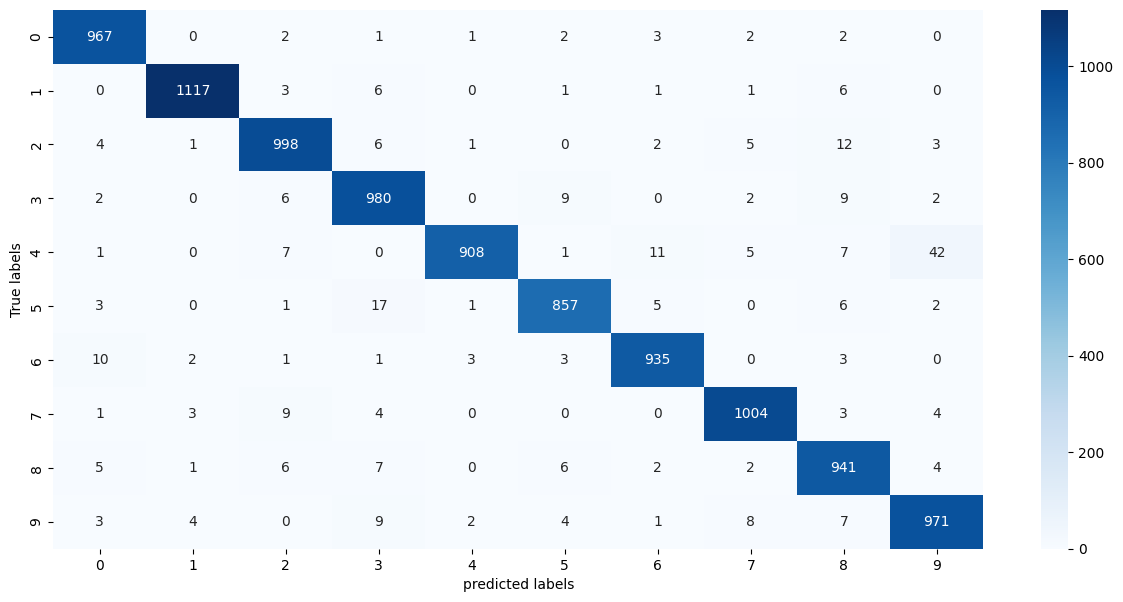

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('predicted labels')

building a predictive system

In [41]:
input_image_path= '/content/MNIST_digit.png'

input_image= cv2.imread(input_image_path)

In [42]:
type(input_image)

numpy.ndarray

In [43]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [44]:
input_image.shape

(318, 318, 3)

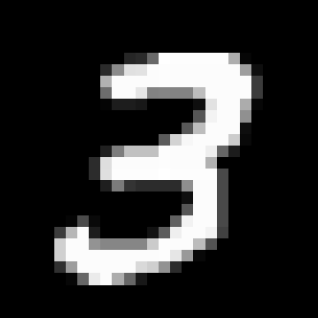

In [47]:
cv2_imshow(input_image)

In [48]:
grayscale= cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [49]:
grayscale.shape

(318, 318)

In [51]:
input_image_resize= cv2.resize(grayscale,(28,28))

In [52]:
input_image_resize.shape

(28, 28)

In [53]:
cv2_imshow(input_image_resize)

In [54]:
input_image_resize= input_image_resize/255

In [55]:
print(input_image_resize[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [56]:
image_reshaped= np.reshape(input_image_resize, [1,28,28])

In [57]:
prediction= model.predict(image_reshaped)
print('Probability for each class in input data')
print('..........')
print(prediction)
print('..........')
prediction_label= np.argmax(prediction)
print('Prediction by the model ',prediction_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Probability for each class in input data
..........
[[1.7699300e-11 2.1023679e-05 3.9469753e-05 1.0000000e+00 4.8960245e-17
  1.0502027e-06 2.0990275e-15 3.6055809e-03 2.9156210e-02 9.8857093e-01]]
..........
Prediction by the model  3


Predictive system

Path of the image to be predicted
/content/MNIST_digit.png
Image given by user


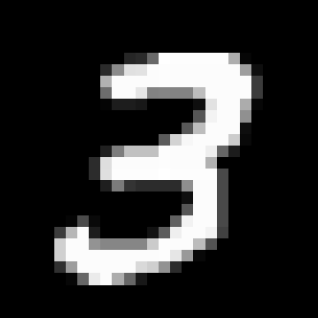

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Probability for each class in input data
..........
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]
..........
Handwritten digit is recognised as  3


In [58]:
input_image_path= input('Path of the image to be predicted\n')

input_image= cv2.imread(input_image_path)
print('Image given by user')
cv2_imshow(input_image)
grayscale= cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize= cv2.resize(grayscale,(28,28))
image_reshaped= np.reshape(input_image_resize, [1,28,28])
prediction= model.predict(image_reshaped)
print('Probability for each class in input data')
print('..........')
print(prediction)
print('..........')
prediction_label= np.argmax(prediction)
print('Handwritten digit is recognised as ',prediction_label)